In [12]:
import pandas as pd
df = pd.read_csv("students.csv")
df

,study_hours,attendance,previous_score,sleep_hours,internet_access,result
0,1,60,35,5,No,Fail
1,2,65,40,6,No,Fail
2,3,70,45,6,Yes,Fail
3,4,75,55,6,Yes,Pass
4,5,80,60,7,Yes,Pass
5,6,85,65,7,Yes,Pass
6,7,90,70,8,Yes,Pass
7,2,55,30,5,No,Fail
8,3,68,50,6,Yes,Fail
9,8,92,75,8,Yes,Pass


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   study_hours      14 non-null     int64 
 1   attendance       14 non-null     int64 
 2   previous_score   14 non-null     int64 
 3   sleep_hours      14 non-null     int64 
 4   internet_access  14 non-null     object
 5   result           14 non-null     object
dtypes: int64(4), object(2)
memory usage: 804.0+ bytes


In [14]:
df["result"].value_counts()


result
Pass    8
Fail    6
Name: count, dtype: int64

In [15]:
df.describe()


,study_hours,attendance,previous_score,sleep_hours
count,14.000000,14.000000,14.000000,14.000000
mean,4.071429,73.714286,52.714286,6.285714
std,2.200150,13.205061,15.637374,1.138729
min,1.000000,50.000000,25.000000,4.000000
25%,2.250000,65.750000,41.250000,6.000000
50%,4.000000,73.500000,56.500000,6.000000
75%,5.750000,84.250000,64.250000,7.000000
max,8.000000,92.000000,75.000000,8.000000


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["internet_access"] = le.fit_transform(df["internet_access"])
df["result"] = le.fit_transform(df["result"])

df


,study_hours,attendance,previous_score,sleep_hours,internet_access,result
0,1,60,35,5,0,0
1,2,65,40,6,0,0
2,3,70,45,6,1,0
3,4,75,55,6,1,1
4,5,80,60,7,1,1
5,6,85,65,7,1,1
6,7,90,70,8,1,1
7,2,55,30,5,0,0
8,3,68,50,6,1,0
9,8,92,75,8,1,1


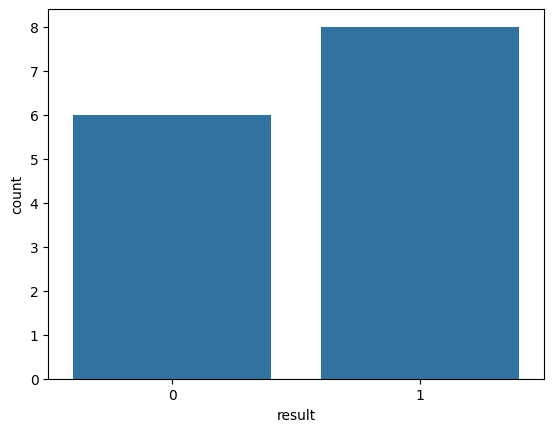

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="result", data=df)
plt.show()


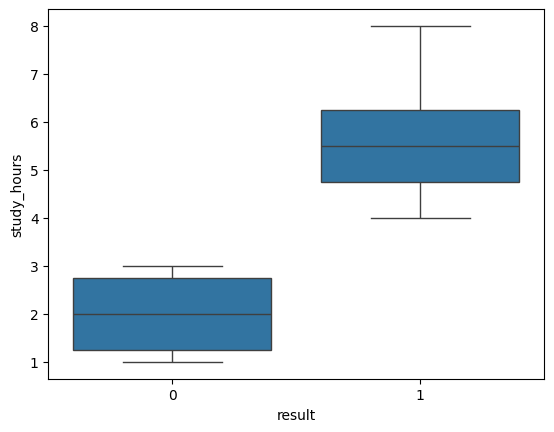

In [18]:
sns.boxplot(x="result", y="study_hours", data=df)
plt.show()


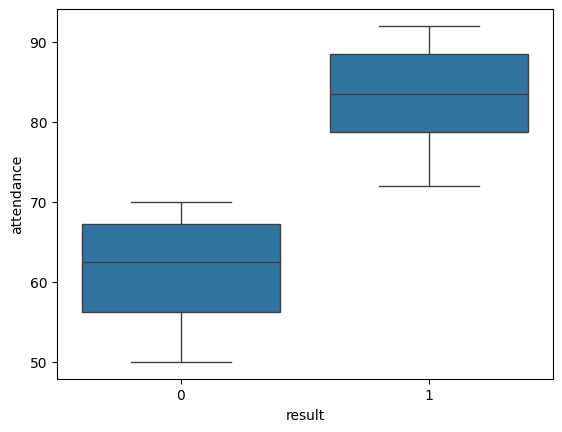

In [19]:
sns.boxplot(x="result", y="attendance", data=df)
plt.show()


In [20]:
X = df.drop("result", axis=1)
y = df["result"]

X


,study_hours,attendance,previous_score,sleep_hours,internet_access
0,1,60,35,5,0
1,2,65,40,6,0
2,3,70,45,6,1
3,4,75,55,6,1
4,5,80,60,7,1
5,6,85,65,7,1
6,7,90,70,8,1
7,2,55,30,5,0
8,3,68,50,6,1
9,8,92,75,8,1


In [21]:
y

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     0
8     0
9     1
10    1
11    0
12    1
13    1
Name: result, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (9, 5)
X_test shape: (5, 5)
y_train shape: (9,)
y_test shape: (5,)


In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [25]:
y_pred = model.predict(X_test)
y_pred


array([1, 0, 0, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[2, 0],
       [0, 3]])

In [28]:
new_df = pd.read_csv("new_students.csv")
new_df


,study_hours,attendance,previous_score,sleep_hours,internet_access
0,3,65,45,6,1
1,5,80,60,7,1
2,2,55,35,5,0
3,7,90,72,8,1
4,4,70,50,6,0


In [29]:
predictions = model.predict(new_df)
predictions


array([0, 1, 0, 1, 0])

In [30]:
new_df["prediction"] = predictions
new_df["prediction"] = new_df["prediction"].map({1: "PASS", 0: "FAIL"})
new_df


,study_hours,attendance,previous_score,sleep_hours,internet_access,prediction
0,3,65,45,6,1,FAIL
1,5,80,60,7,1,PASS
2,2,55,35,5,0,FAIL
3,7,90,72,8,1,PASS
4,4,70,50,6,0,FAIL
